In [1]:
options(repr.plot.width=14, repr.plot.height=10)
 
install.packages('RCurl')
require(repr) # Enables resizing of the plots.
require(RCurl)
require(foreign)
require(tidyverse) # To tip the df from long row of dates to cols (pivot_longer())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Loading required package: repr

Loading required package: RCurl

Loading required package: foreign

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



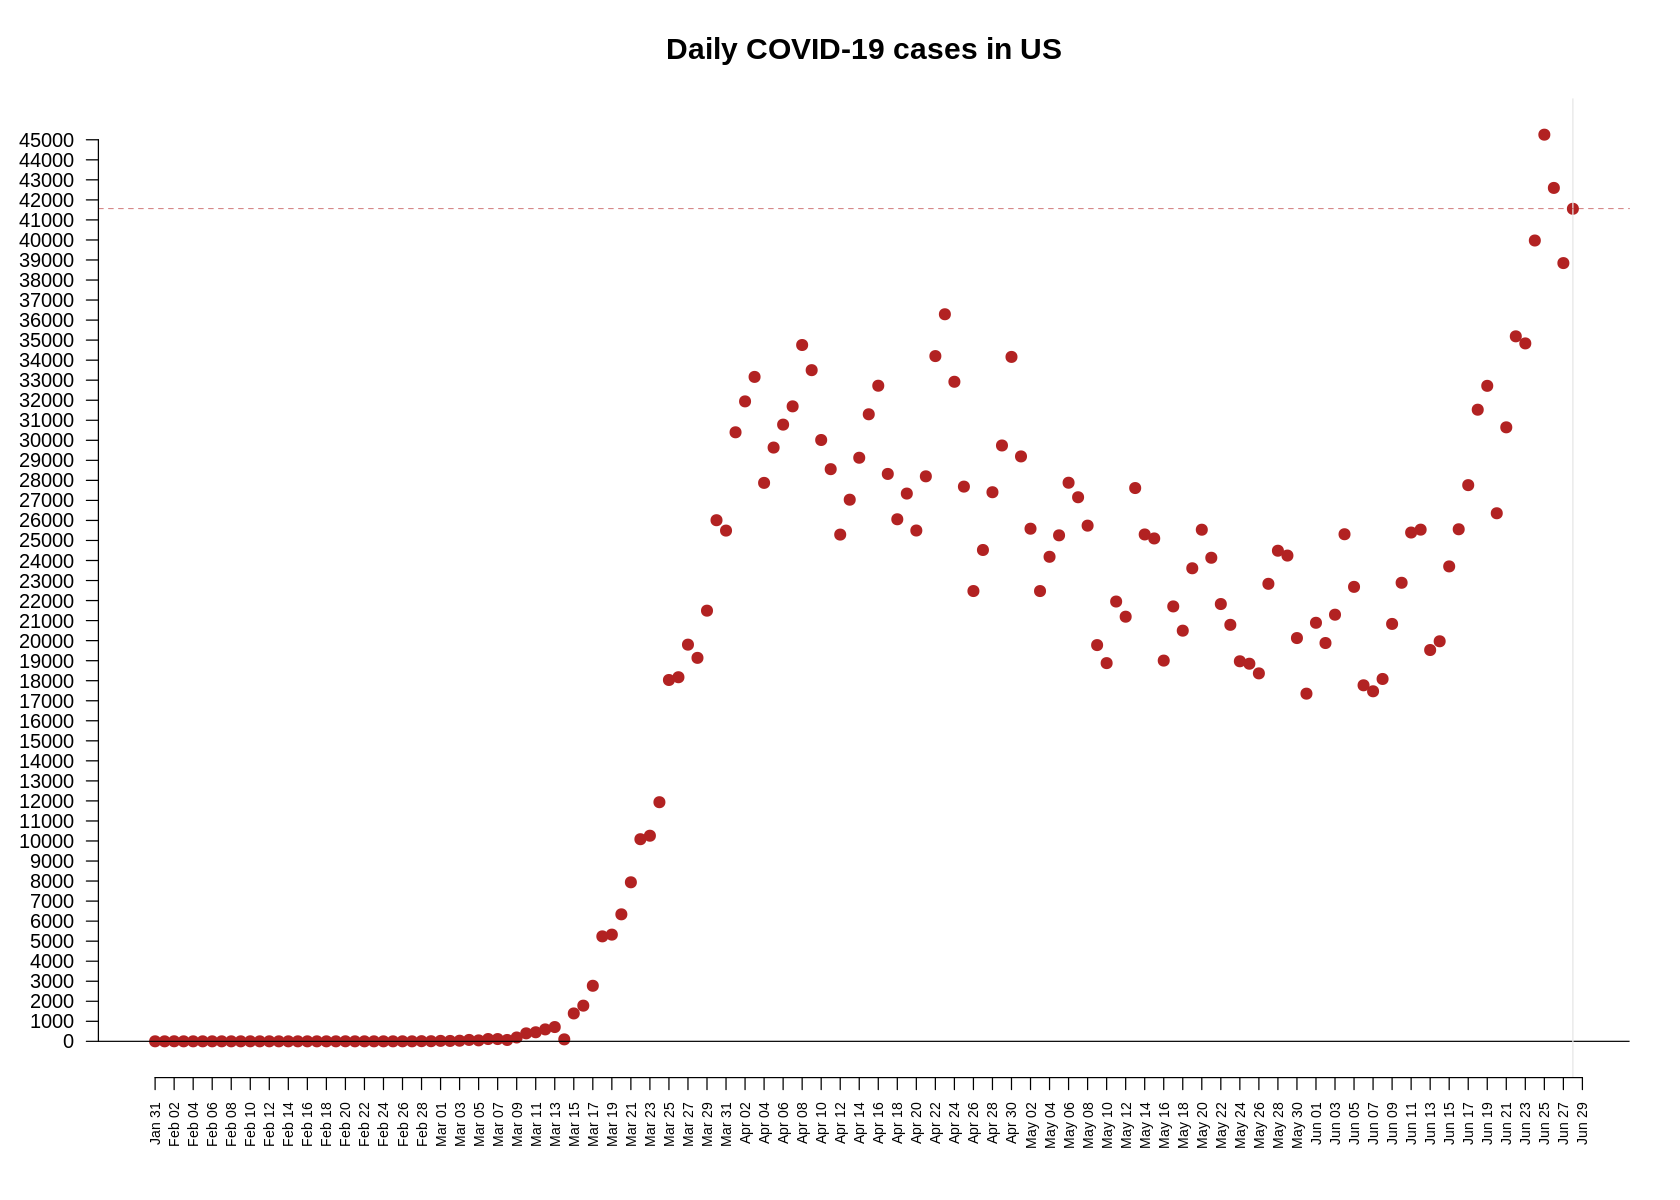

In [2]:
# Extracting the number of confirmed cummulative cases by country from the Johns Hopkins website:
 
x = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
corona <- read.csv(textConnection(x))
 
corona = (read_csv(x)
          %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                           names_to = "date",
                           values_to = "cases")
          %>% select(`Province/State`,`Country/Region`, date, cases)
          %>% mutate(date=as.Date(date,format="%m/%d/%y"))
          %>% drop_na(cases)
          %>% rename(country="Country/Region", provinces="Province/State")
)
 
cc <- (corona
       %>% filter(country %in% c("US"))
)
 
ccw <- (cc
        %>% pivot_wider(names_from="country",values_from="cases")
        %>% filter(US>5)
)

first.der<-diff(ccw$US, lag = 1, differences = 1)

plot(ccw$date[2:length(ccw$date)-1], first.der, 
     pch = 19, cex = 1.2,
     ylab='', 
     xlab='',
     main ='Daily COVID-19 cases in US',
     col="firebrick",
     axes=FALSE,
     cex.main=1.5)
     
abline(h=0)
abline(v=ccw$date[length(ccw$date)-1], col='gray90')
abline(h=first.der[length(ccw$date)-1], col='firebrick', lty=2, lwd=.5)

at1 <- seq(min(ccw$date), max(ccw$date), by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
axis(side=2, seq(min(first.der),max(first.der),1000), 
     las=2, cex.axis=1)

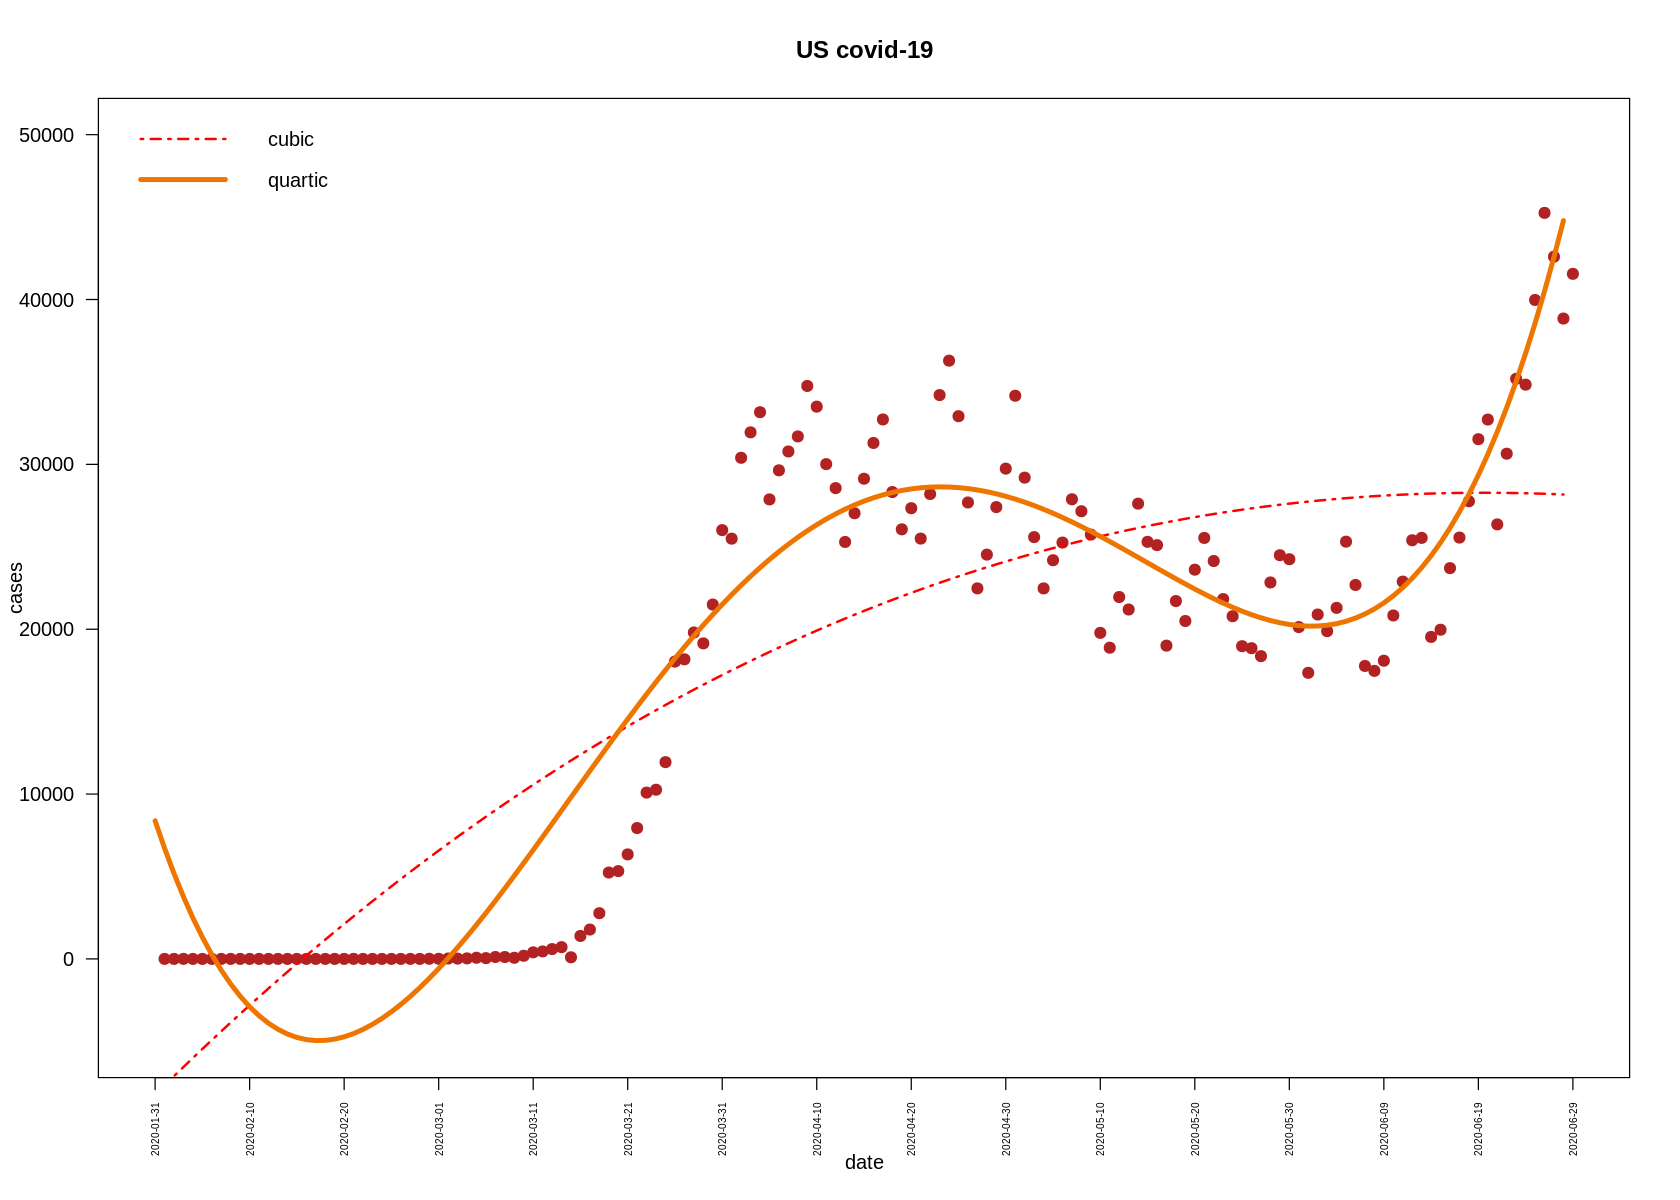

In [3]:
ccw$first.der <- c(NA, diff(ccw$US))  ## better add an NA and integrate in data frame
ccw$day <- seq_along(ccw$date)

fit3 <- lm(first.der ~ poly(day, 3, raw=TRUE), ccw[-1, ])  ## cubic
fit4 <- lm(first.der ~ poly(day, 4, raw=TRUE), ccw[-1, ])  ## quartic

with(ccw, plot(day, first.der, main="US covid-19", xaxt="n",
      xlab='date', 
      ylab='cases',
      ylim=c(-5000, 50000),
      las = 2,
      col='firebrick', pch = 19, cex = 1.2))

tck <- seq(min(ccw$day), max(ccw$day), by=10)
axis(1, tck, labels=FALSE)
mtext(ccw$date[tck], 1, 1, at=tck, las=2, cex=.5)

lines(fit3$fitted.values, col='red', lwd=2, lty=4)
lines(fit4$fitted.values, col='darkorange2', lwd=4)
legend("topleft", c("cubic", "quartic"), lty = c(4,1), lwd=c(2,4), col=c(2,'darkorange2'), bg="transparent", box.lty=0)

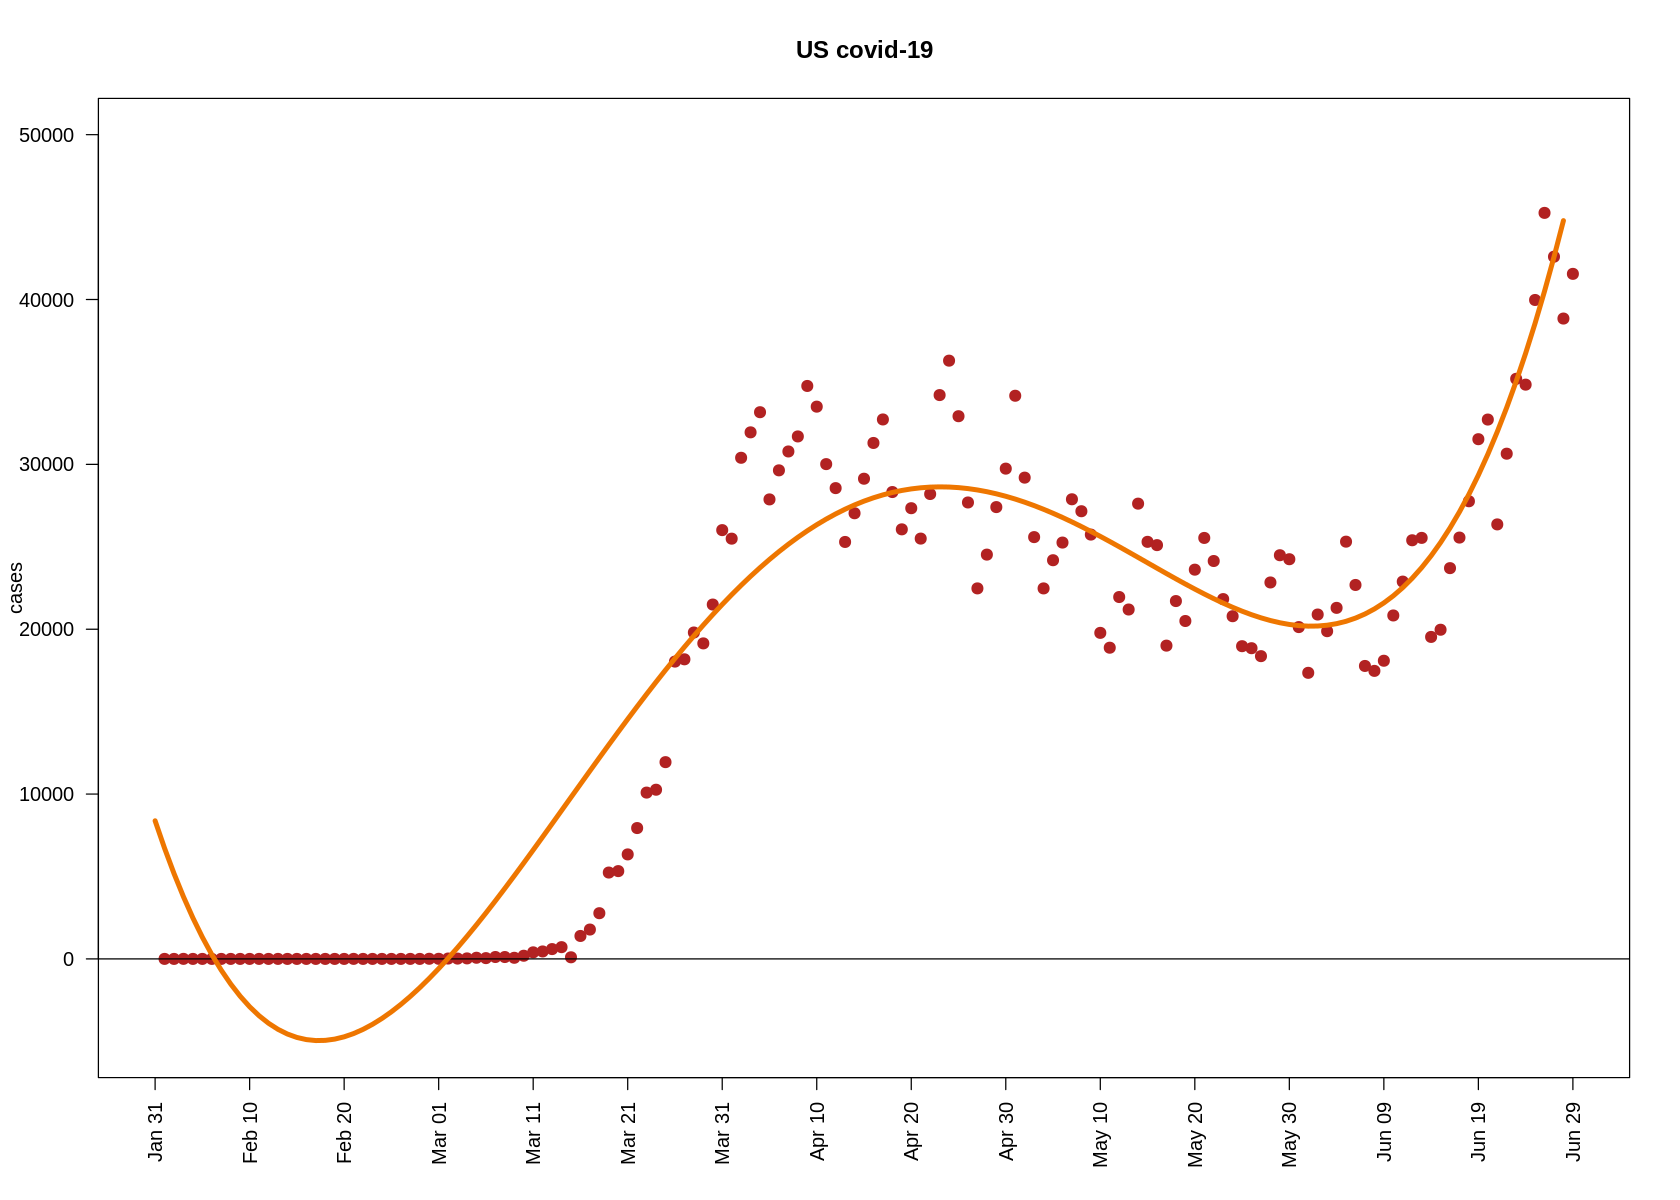

In [4]:
ccw$first.der <- c(NA, diff(ccw$US))  ## better add an NA and integrate in data frame
ccw$day <- seq_along(ccw$date)

fit3 <- lm(first.der ~ poly(day, 3, raw=TRUE), ccw[-1, ])  ## cubic
fit4 <- lm(first.der ~ poly(day, 4, raw=TRUE), ccw[-1, ])  ## quartic

with(ccw, plot(day, first.der, main="US covid-19", xaxt="n",
      xlab='', 
      ylab='cases',
      ylim=c(-5000, 50000),
      las = 2,
      col='firebrick', pch = 19, cex = 1.2))

abline(h=0)

tck <- seq(min(ccw$day), max(ccw$day), by=10)
axis(1, tck, labels=FALSE)

mtext(strftime(ccw$date[tck], "%b %d"), 1, 1, at=tck, las=2)

lines(fit4$fitted.values, col='darkorange2', lwd=4)